In [4]:
from __future__ import division
import numpy as np
from numpy import linalg

def jacobi(A,b,x0,tol,N):
    #preliminares
    A = A.astype('double')
    b = b.astype('double')
    x0 = x0.astype('double')

    n=np.shape(A)[0]
    x = np.zeros(n)
    it = 0
    #iteracoes
    while (it < N):
        it = it+1
        #iteracao de Jacobi
        for i in np.arange(n):
            x[i] = b[i]
            for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):
                x[i] -= A[i,j]*x0[j]
            x[i] /= A[i,i]
        #tolerancia
        if (np.linalg.norm(x-x0,np.inf) < tol):
            return x
        #prepara nova iteracao
        x0 = np.copy(x)
    raise NameError('num. max. de iteracoes excedido.')


# Matriz A
A = np.array([[1, 2, -1, 0],
              [2, -1, 0, 0],
              [0, -1, 2, -1],
              [0, 0, -1, 2]])

# Vetor de termos independentes b
b = np.array([1,1,1, 1])

# Vetor inicial x0
x0 = np.array([[0],[0],[0], [0]])

# Tolerância
tolerance = 0.0001

# Número máximo de iterações
max_iterations = 1000

# Resolução do sistema usando o método de Jacobi
try:
    x_jacobi = jacobi(A, b, x0, tolerance, max_iterations)
    print("Solução pelo método de Jacobi:", x_jacobi)
except NameError as e:
    print(e)


num. max. de iteracoes excedido.


In [5]:
import numpy as np
from numpy import linalg
def gauss_seidel(A,b,tol,max):
  x = np.zeros_like(b,dtype=np.double)
  for k in range(max):
    x_old = x.copy()
    for i in range(A.shape[0]):
      x[i] = (b[i]-np.dot(A[i,:i],x[:i])-np.dot(A[i,(i+1):],x_old[(i+1):]))/ A[i,i]
    if np.linalg.norm(x-x_old,ord=np.inf)/np.linalg.norm(x,ord=np.inf)<tol:
      break
  return x
A = np.array([[1, 2, -1, 0],
              [2, -1, 0, 0],
              [0, -1, 2, -1],
              [0, 0, -1, 2]])

# Vetor de termos independentes b
b = np.array([[1],[1],[1], [1]])

# Vetor inicial x0
x0 = np.array([[0],[0],[0], [0]])
M = gauss_seidel(A,b,0.0001,20)
print(M)



[[-5.13487356e+08]
 [-1.02697471e+09]
 [-4.74881418e+08]
 [-2.37440708e+08]]


Polinômio interpolador:        3       2
-1.05 x + 8.4 x - 19.45 x + 14.1


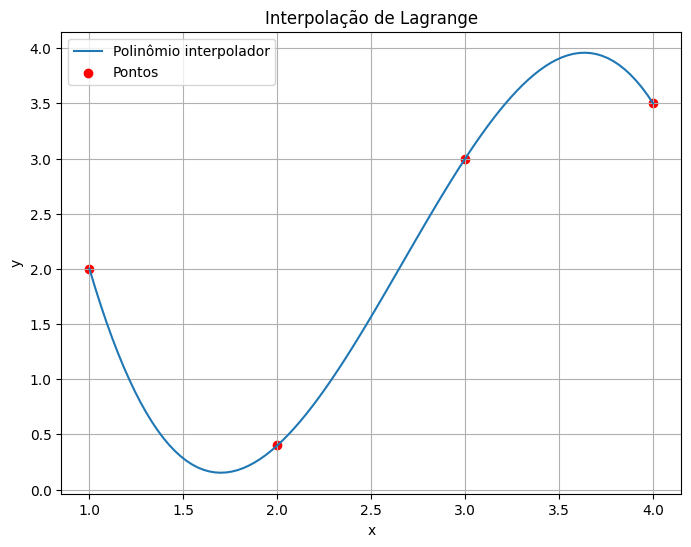

In [14]:
import numpy as np

# Pontos de dados
x = np.array([1, 2, 3, 4])
y = np.array([2, 0.4, 3, 3.5])

# Grau do polinômio interpolador
degree = len(x) - 1

# Função de interpolação de Lagrange
def lagrange_interpolation(x, y, degree, xi):
    result = 0
    for i in range(degree+1):
        term = y[i]
        for j in range(degree+1):
            if j != i:
                term *= (xi - x[j]) / (x[i] - x[j])
        result += term
    return result

# Valores xi para interpolação
xi = np.linspace(1, 4, 100)

# Calculando os valores yi interpolados
yi = [lagrange_interpolation(x, y, degree, val) for val in xi]

# Imprimindo os coeficientes do polinômio interpolador
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)
print("Polinômio interpolador:", polynomial)

# Plotando os pontos e o polinômio interpolador
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(xi, yi, label='Polinômio interpolador')
plt.scatter(x, y, color='red', label='Pontos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolação de Lagrange')
plt.legend()
plt.grid(True)
plt.show()




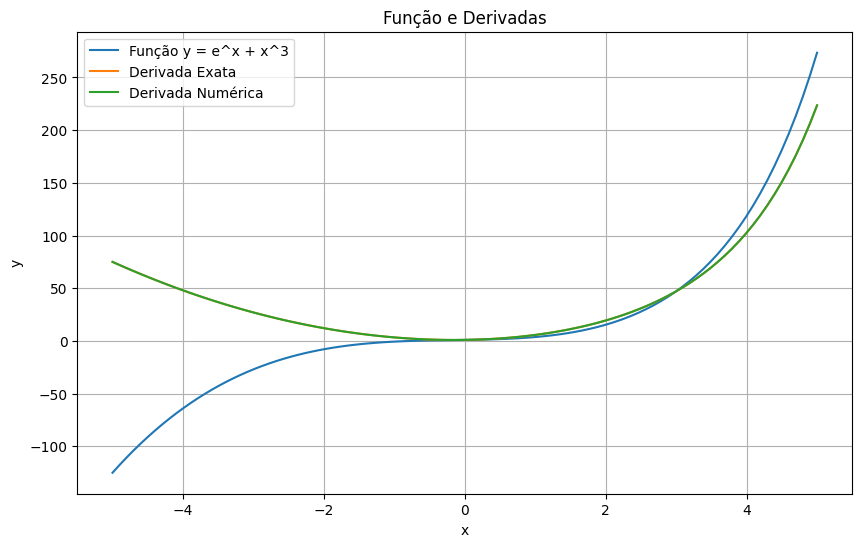

Derivada exata: [75.00673794699908, 72.00776019988736, 69.07007681507241, 66.19369588310427, 63.378626354459705, 60.62487813094227, 57.932462166796505, 55.301390580569745, 52.73167677886316, 50.223335593236406, 47.77638343166312, 45.390838446084715, 43.06672071777277, 40.80405246239334, 38.60285825686719, 36.463165290342275, 34.38500364184173, 32.368406587422356, 30.413410939980395, 28.520057425174432, 26.68839109730437, 24.918461799393278, 23.210324672170263, 21.564040717152185, 19.979677419573868, 18.45730943752841, 16.99701936435459, 15.598898572056807, 14.263048144370279, 12.989579908999714, 11.77861757957235, 10.630298018966725, 9.544772636917859, 8.522208936170895, 7.562792222971979, 6.666727499363507, 5.834241556607315, 5.0655852911132175, 4.361036266522554, 3.7209015481099907, 3.1455208384477187, 2.635269946352526, 2.190564624539685, 1.8118648151727224, 1.499679346663358, 1.2545711296840847, 1.0771629054535556, 0.9681436049947034, 0.9282753843044873, 0.9584014072764874, 1.05945

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return math.exp(x) + x**3

def derivative_exact(x):
    return math.exp(x) + 3*x**2

def derivative_numeric(x, h=0.001):
    return (func(x + h) - func(x)) / h

# Valores de x para o gráfico
x = np.linspace(-5, 5, 100)

# Valores correspondentes de y, derivada exata e derivada numérica
y = [func(i) for i in x]
exact_derivative = [derivative_exact(i) for i in x]
numeric_derivative = [derivative_numeric(i) for i in x]

# Plotando a função e as derivadas
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Função y = e^x + x^3')
plt.plot(x, exact_derivative, label='Derivada Exata')
plt.plot(x, numeric_derivative, label='Derivada Numérica')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Função e Derivadas')
plt.legend()
plt.grid(True)
plt.show()
print("Derivada exata:", exact_derivative)
print("Derivada numérica:", numeric_derivative)



Equação da reta de regressão: y = 0.5000000000000003 * x + 2.749999999999999


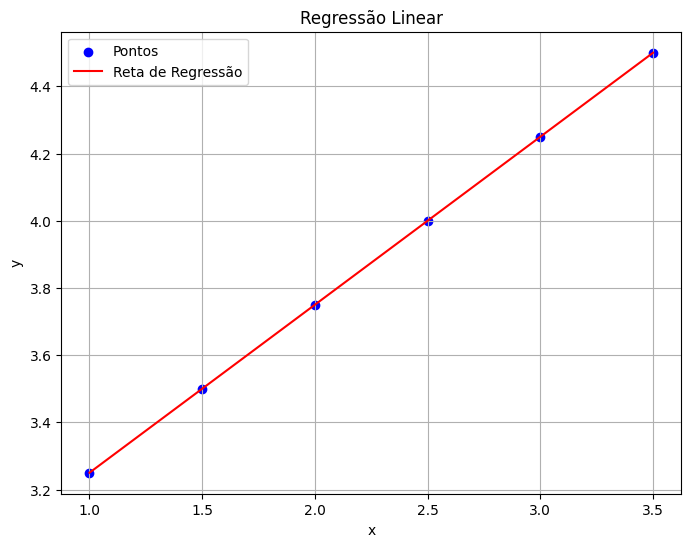

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de entrada (pontos)
x = [1, 1.5, 2, 2.5, 3, 3.5]
y = [3.25, 3.5, 3.75, 4, 4.25, 4.5]

# Realizando a regressão linear
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]  # Coeficiente angular
intercept = coefficients[1]  # Coeficiente linear

# Equação da reta de regressão
equacao_reta = f"y = {slope} * x + {intercept}"
print("Equação da reta de regressão:", equacao_reta)

# Pontos de x para o gráfico
x_grafico = np.linspace(min(x), max(x), 100)

# Valores correspondentes de y para a reta de regressão
y_regressao = slope * x_grafico + intercept

# Plotando os pontos e a reta de regressão
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Pontos')
plt.plot(x_grafico, y_regressao, color='red', label='Reta de Regressão')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear')
plt.legend()
plt.grid(True)
plt.show()



In [13]:
import math
import numpy as np

def func_a(x):
    return np.cos(2*x)

def func_b(x):
    return np.log(x)

def riemann_sum(func, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    return dx * np.sum(y[:-1])

def trapezoidal_rule(func, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    return dx * (np.sum(y) - 0.5 * (y[0] + y[-1]))

def simpsons_rule(func, a, b, n):
    if n % 2 != 0:
        n += 1  # Ajuste para garantir que seja um número par de subintervalos
    dx = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    return (dx / 3) * (np.sum(y[0:-1:2]) + 4*np.sum(y[1:-1:2]) + y[-1])

def absolute_error(true_value, approx_value):
    return np.abs(true_value - approx_value)

# Intervalo de integração para a integral (a)
a_a = 2
b_a = 5

# Intervalo de integração para a integral (b)
a_b = 1
b_b = 4

# Número de subintervalos para as tabelas
n_values = [4, 10, 25, 100]

# Tabela 1: Comparação dos resultados (integral a)
print("Tabela 1: Comparação dos resultados (integral a)")
print("n \t\t Riemann \t\t Trapézios \t\t Simpson")
print("-" * 56)
for n in n_values:
    result_riemann_a = riemann_sum(func_a, a_a, b_a, n)
    result_trapezoidal_a = trapezoidal_rule(func_a, a_a, b_a, n)
    result_simpson_a = simpsons_rule(func_a, a_a, b_a, n)
    print(f"{n} \t\t {result_riemann_a:.6f} \t\t {result_trapezoidal_a:.6f} \t\t {result_simpson_a:.6f}")
print()

# Tabela 2: Comparação dos erros absolutos (integral a)
print("Tabela 2: Comparação dos erros absolutos (integral a)")
print("n \t\t Erro Riemann \t\t Erro Trapézios \t\t Erro Simpson")
print("-" * 72)
true_value_a = math.sin(4) - math.sin(10)
for n in n_values:
    result_riemann_a = riemann_sum(func_a, a_a, b_a, n)
    result_trapezoidal_a = trapezoidal_rule(func_a, a_a, b_a, n)
    result_simpson_a = simpsons_rule(func_a, a_a, b_a, n)
    error_riemann_a = absolute_error(true_value_a, result_riemann_a)
    error_trapezoidal_a = absolute_error(true_value_a, result_trapezoidal_a)
    error_simpson_a = absolute_error(true_value_a, result_simpson_a)
    print(f"{n} \t\t {error_riemann_a:.6f} \t\t {error_trapezoidal_a:.6f} \t\t {error_simpson_a:.6f}")
print()

# Tabela 1: Comparação dos resultados (integral b)
print("Tabela 1: Comparação dos resultados (integral b)")
print("n \t\t Riemann \t\t Trapézios \t\t Simpson")
print("-" * 56)
for n in n_values:
    result_riemann_b = riemann_sum(func_b, a_b, b_b, n)
    result_trapezoidal_b = trapezoidal_rule(func_b, a_b, b_b, n)
    result_simpson_b = simpsons_rule(func_b, a_b, b_b, n)
    print(f"{n} \t\t {result_riemann_b:.6f} \t\t {result_trapezoidal_b:.6f} \t\t {result_simpson_b:.6f}")
print()

# Tabela 2: Comparação dos erros absolutos (integral b)
print("Tabela 2: Comparação dos erros absolutos (integral b)")
print("n \t\t Erro Riemann \t\t Erro Trapézios \t\t Erro Simpson")
print("-" * 72)
true_value_b = b_b * (math.log(b_b) - 1) - a_b * (math.log(a_b) - 1)
for n in n_values:
    result_riemann_b = riemann_sum(func_b, a_b, b_b, n)
    result_trapezoidal_b = trapezoidal_rule(func_b, a_b, b_b, n)
    result_simpson_b = simpsons_rule(func_b, a_b, b_b, n)
    error_riemann_b = absolute_error(true_value_b, result_riemann_b)
    error_trapezoidal_b = absolute_error(true_value_b, result_trapezoidal_b)
    error_simpson_b = absolute_error(true_value_b, result_simpson_b)
    print(f"{n} \t\t {error_riemann_b:.6f} \t\t {error_trapezoidal_b:.6f} \t\t {error_simpson_b:.6f}")
print()


Tabela 1: Comparação dos resultados (integral a)
n 		 Riemann 		 Trapézios 		 Simpson
--------------------------------------------------------
4 		 0.155187 		 0.085652 		 -0.078045
10 		 0.130994 		 0.103180 		 0.016284
25 		 0.117005 		 0.105880 		 0.060270
100 		 0.109140 		 0.106359 		 0.081217

Tabela 2: Comparação dos erros absolutos (integral a)
n 		 Erro Riemann 		 Erro Trapézios 		 Erro Simpson
------------------------------------------------------------------------
4 		 0.367969 		 0.298433 		 0.134736
10 		 0.343775 		 0.315961 		 0.229065
25 		 0.329787 		 0.318661 		 0.273052
100 		 0.321922 		 0.319140 		 0.293998

Tabela 1: Comparação dos resultados (integral b)
n 		 Riemann 		 Trapézios 		 Simpson
--------------------------------------------------------
4 		 1.990921 		 2.510782 		 2.313917
10 		 2.331630 		 2.539574 		 2.193913
25 		 2.461100 		 2.544278 		 2.148192
100 		 2.524327 		 2.545121 		 2.127950

Tabela 2: Comparação dos erros absolutos (integral b)
n 		 Erro